# Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
colunas = ['NU_NOTA_REDACAO', 'TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_IDADE', 'TP_SEXO', 'TP_STATUS_REDACAO','TP_ANO_CONCLUIU','TP_ST_CONCLUSAO','TP_COR_RACA','Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q024', 'Q025']

In [3]:
dados = pd.read_csv('dados/MICRODADOS_ENEM_2019.csv', encoding='iso-8859-1', sep = ';', usecols = colunas)

In [4]:
dados.columns

Index(['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q024', 'Q025'],
      dtype='object')

In [5]:
renomear = {
    'NU_IDADE' : 'idade', 
    'TP_SEXO' : 'sexo', 
    'TP_COR_RACA': 'raca', 
    'TP_ST_CONCLUSAO' : 'st conclusao EM',
    'TP_ANO_CONCLUIU' : 'ano conclusao EM', 
    'TP_ESCOLA': 'tipo de escola', 
    'NU_NOTA_CN' : 'nota CN', 
    'NU_NOTA_CH' : 'nota CH',
    'NU_NOTA_LC' : 'nota LC', 
    'NU_NOTA_MT' : 'nota MT', 
    'TP_STATUS_REDACAO' : 'status redacao', 
    'NU_NOTA_REDACAO' : 'nota redacao',
    'Q001' : 'grau estudo pai', 
    'Q002' : 'grau estudo mae', 
    'Q003' : 'ocupacao pai', 
    'Q004' : 'ocupacao mae', 
    'Q006' : 'renda mensal familia', 
    'Q024' : 'tem computador', 
    'Q025' : 'acesso a internet'
}

In [6]:
enem = dados.rename(columns=renomear)

## Verifica total de valores nulos nas variáveis analisadas

In [7]:
enem.isnull().sum()

idade                        69
sexo                          0
raca                          0
st conclusao EM               0
ano conclusao EM              0
tipo de escola                0
nota CN                 1384837
nota CH                 1172125
nota LC                 1172125
nota MT                 1384837
status redacao          1172126
nota redacao            1172126
grau estudo pai               0
grau estudo mae               0
ocupacao pai                  0
ocupacao mae                  0
renda mensal familia          0
tem computador                0
acesso a internet             0
dtype: int64

In [8]:
enem = enem.dropna(subset=['idade'])

In [9]:
enem['idade'] = enem['idade'].astype(int)

In [10]:
enem.head(10)

,idade,sexo,raca,st conclusao EM,ano conclusao EM,tipo de escola,nota CN,nota CH,nota LC,nota MT,status redacao,nota redacao,grau estudo pai,grau estudo mae,ocupacao pai,ocupacao mae,renda mensal familia,tem computador,acesso a internet
0,36,M,3,1,11,1,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,A,C,B
1,23,M,1,1,5,1,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,C,A,B
2,39,F,3,1,13,1,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,B,A,B
3,25,F,1,1,4,1,483.8,503.6,537.3,392.0,1.0,460.0,C,E,B,D,E,B,B
4,22,F,1,1,4,1,513.6,575.5,570.7,677.0,1.0,860.0,E,E,C,C,G,B,B
5,37,M,2,1,13,1,563.7,644.9,564.2,675.3,1.0,800.0,B,B,C,B,E,B,B
6,22,F,3,1,5,1,484.6,488.4,507.2,594.7,1.0,600.0,E,B,C,B,B,A,A
7,20,M,3,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,E,B,B,B,D,A,B
8,20,F,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,F,C,A,A
9,17,M,1,2,0,2,543.9,548.1,502.5,480.7,1.0,400.0,E,E,B,B,F,B,B


## Participantes por sexo

In [11]:
por_sexo = (enem['sexo'].value_counts(normalize = True) * 100).round(2)
pd.DataFrame(por_sexo)

,sexo
F,59.5
M,40.5


## Participantes por raça

In [12]:
enem['raca'].unique() #verifica os ids usados, a nomenclatura respectiva é buscada do dicionário de dados

array([3, 1, 2, 4, 0, 5])

In [13]:
id_raca = {
    3 : 'Parda', 
    1 : 'Branca', 
    2 : 'Preta', 
    4 : 'Amarela', 
    0 : 'Não declarado', 
    5 : 'Indígena'
}

In [14]:
enem['raca'] = enem['raca'].map(id_raca)

In [15]:
por_raca = (enem['raca'].value_counts(normalize = True) * 100).round(2)
pd.DataFrame(por_raca)

,raca
Parda,46.40
Branca,35.95
Preta,12.72
Amarela,2.28
Não declarado,2.03
Indígena,0.62


## Participantes por tipo de escola

In [16]:
enem['tipo de escola'].unique()

array([1, 2, 3])

In [17]:
id_tipo_escola = {
    1 : 'Não respondeu', 
    2 : 'Pública', 
    3 : 'Privada'
}

In [18]:
enem['tipo de escola'] = enem['tipo de escola'].map(id_tipo_escola)

In [19]:
por_escola = (enem['tipo de escola'].value_counts(normalize = True) * 100).round(2)
pd.DataFrame(por_escola)

,tipo de escola
Não respondeu,71.23
Pública,24.48
Privada,4.29


## Análise I - Situação da redação

In [20]:
enem = enem.dropna(subset=['status redacao'])

In [21]:
enem['status redacao'] = enem['status redacao'].astype(int)

In [22]:
enem['status redacao'].unique()

array([1, 4, 6, 9, 2, 3, 8, 7])

In [23]:
id_status_redacao = {
    1 : 'Sem problemas', 
    4 : 'Em branco', 
    6 : 'Fuga ao tema', 
    9 : 'Parte desconectada', 
    2 : 'Anulada', 
    3 : 'Cópia txt motivador', 
    8 : 'Txt insuficiente', 
    7 : 'N atendimento ao tp textual'
}
    

In [24]:
enem['status redacao'] = enem['status redacao'].map(id_status_redacao)

In [25]:
analise_redacao = (enem['status redacao'].value_counts(normalize = True) * 100).round(2)
pd.DataFrame(analise_redacao)

,status redacao
Sem problemas,96.34
Em branco,1.45
Fuga ao tema,1.04
Cópia txt motivador,0.59
Txt insuficiente,0.22
Anulada,0.14
Parte desconectada,0.12
N atendimento ao tp textual,0.10


## Grau de estudo do pai / ou resp. do sexo masculino

In [26]:
enem['grau estudo pai'].unique()

array(['C', 'E', 'B', 'D', 'H', 'F', 'A', 'G'], dtype=object)

In [27]:
grau_pai = {
    'C' : 'Compl. 4º e 5º, mas não EF', 
    'E' : 'Compl. EM, mas não completou faculdade', 
    'B' : 'Não completou 4º e 5º', 
    'D' : 'Compl. 8º e 9º, mas não o EM', 
    'H' : 'Não sei', 
    'F' : 'Compl. faculdade, mas não pós', 
    'A' : 'Nunca estudou', 
    'G' : 'Compl. pós'
}

In [28]:
enem['grau estudo pai'] = enem['grau estudo pai'].map(grau_pai)

In [29]:
estudo_pai = (enem['grau estudo pai'].value_counts(normalize = True) * 100).round(2)
estudo_pai

Compl. EM, mas não completou faculdade    26.98
Não completou 4º e 5º                     20.54
Compl. 4º e 5º, mas não EF                13.99
Compl. 8º e 9º, mas não o EM              11.72
Não sei                                    8.39
Compl. faculdade, mas não pós              8.17
Compl. pós                                 5.12
Nunca estudou                              5.11
Name: grau estudo pai, dtype: float64

## Grau de estudo da mãe / ou resp. do sexo feminino

In [30]:
grau_mae = {
    'C' : 'Compl. 4º e 5º, mas não EF', 
    'E' : 'Compl. EM, mas não completou faculdade', 
    'B' : 'Não completou 4º e 5º', 
    'D' : 'Compl. 8º e 9º, mas não o EM', 
    'H' : 'Não sei', 
    'F' : 'Compl. faculdade, mas não pós', 
    'A' : 'Nunca estudou', 
    'G' : 'Compl. pós'
}

In [31]:
enem['grau estudo mae'] = enem['grau estudo mae'].map(grau_mae)

In [32]:
estudo_mae = (enem['grau estudo mae'].value_counts(normalize = True) * 100).round(2)
estudo_mae

Compl. EM, mas não completou faculdade    33.22
Não completou 4º e 5º                     15.10
Compl. 8º e 9º, mas não o EM              12.93
Compl. 4º e 5º, mas não EF                12.85
Compl. faculdade, mas não pós             11.06
Compl. pós                                 8.82
Nunca estudou                              3.34
Não sei                                    2.68
Name: grau estudo mae, dtype: float64

## Ocupação do pai

### A - Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
### B - Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
### C - Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
### D - Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
### E - Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
### F - Não sei.


In [33]:
ocupacao_pai = (enem['ocupacao pai'].value_counts(normalize = True) * 100).round(2)
ocupacao_pai

C    23.43
B    20.58
A    20.43
D    18.46
F    10.99
E     6.12
Name: ocupacao pai, dtype: float64

## Ocupação da mãe

### A - Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.
### B - Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.
### C - Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.
### D - Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.
### E - Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.
### F - Não sei.


In [34]:
ocupacao_mae = (enem['ocupacao mae'].value_counts(normalize = True) * 100).round(2)
ocupacao_mae

B    42.04
D    21.83
A    16.57
F     8.55
C     6.77
E     4.23
Name: ocupacao mae, dtype: float64

## Renda mensal da família 

### A - Nenhuma renda.
### B - Até R$ 998,00.
### C - De R$ 998,01 até R$ 1.497,00.
### D - De R$ 1.497,01 até R$ 1.996,00.
### E - De R$ 1.996,01 até R$ 2.495,00.
### F - De R$ 2.495,01 até R$ 2.994,00.
### G - De R$ 2.994,01 até R$ 3.992,00.
### H - De R$ 3.992,01 até R$ 4.990,00.
### I - De R$ 4.990,01 até R$ 5.988,00.
### J - De R$ 5.988,01 até R$ 6.986,00.
### K - De R$ 6.986,01 até R$ 7.984,00.
### L - De R$ 7.984,01 até R$ 8.982,00.
### M - De R$ 8.982,01 até R$ 9.980,00.
### N - De R$ 9.980,01 até R$ 11.976,00.
### O - De R$ 11.976,01 até R$ 14.970,00.
### P - De R$ 14.970,01 até R$ 19.960,00.
### Q - Mais de R$ 19.960,00.


In [35]:
renda_familia = (enem['renda mensal familia'].value_counts(normalize = True)*100).round(2)
renda_familia

C    24.66
B    24.30
D     9.66
E     9.32
G     6.25
F     4.61
A     4.32
H     4.11
I     3.12
J     1.77
N     1.37
K     1.28
Q     1.25
O     1.11
L     0.97
P     0.95
M     0.95
Name: renda mensal familia, dtype: float64

## Renda familiar em relação a ocupação da mãe

In [36]:
analise_renda01 = enem[(enem['renda mensal familia'] == 'C')]
analise_renda01['ocupacao mae'].value_counts(normalize = True) * 100

B    53.361856
A    16.061099
D    13.492700
F     8.408310
C     8.072155
E     0.603879
Name: ocupacao mae, dtype: float64

In [37]:
analise_renda02 = enem[(enem['renda mensal familia'] == 'B')]
analise_renda02['ocupacao mae'].value_counts(normalize = True) * 100

B    46.845561
A    33.240338
F     8.155226
D     6.427920
C     5.037600
E     0.293356
Name: ocupacao mae, dtype: float64

In [38]:
analise_renda03 = enem[(enem['renda mensal familia'] == 'D')]
analise_renda03['ocupacao mae'].value_counts(normalize = True) * 100

B    49.823807
D    20.832266
A    10.131056
C     9.551664
F     8.348533
E     1.312674
Name: ocupacao mae, dtype: float64

In [39]:
enem[enem['status redacao'] != 'Sem problemas'].raca.value_counts(normalize=True)*100

Parda            53.196139
Branca           26.825992
Preta            13.873017
Não declarado     2.602148
Amarela           2.311242
Indígena          1.191462
Name: raca, dtype: float64

In [40]:
enem.head(5)

,idade,sexo,raca,st conclusao EM,ano conclusao EM,tipo de escola,nota CN,nota CH,nota LC,nota MT,status redacao,nota redacao,grau estudo pai,grau estudo mae,ocupacao pai,ocupacao mae,renda mensal familia,tem computador,acesso a internet
3,25,F,Branca,1,4,Não respondeu,483.8,503.6,537.3,392.0,Sem problemas,460.0,"Compl. 4º e 5º, mas não EF","Compl. EM, mas não completou faculdade",B,D,E,B,B
4,22,F,Branca,1,4,Não respondeu,513.6,575.5,570.7,677.0,Sem problemas,860.0,"Compl. EM, mas não completou faculdade","Compl. EM, mas não completou faculdade",C,C,G,B,B
5,37,M,Preta,1,13,Não respondeu,563.7,644.9,564.2,675.3,Sem problemas,800.0,Não completou 4º e 5º,Não completou 4º e 5º,C,B,E,B,B
6,22,F,Parda,1,5,Não respondeu,484.6,488.4,507.2,594.7,Sem problemas,600.0,"Compl. EM, mas não completou faculdade",Não completou 4º e 5º,C,B,B,A,A
9,17,M,Branca,2,0,Pública,543.9,548.1,502.5,480.7,Sem problemas,400.0,"Compl. EM, mas não completou faculdade","Compl. EM, mas não completou faculdade",B,B,F,B,B


In [41]:
enem.groupby('raca')['idade'].mean()

raca
Amarela          20.661898
Branca           20.424577
Indígena         21.570105
Não declarado    21.374816
Parda            21.618950
Preta            22.311877
Name: idade, dtype: float64

In [42]:
enem.groupby('raca')['idade'].min()

raca
Amarela          13
Branca           10
Indígena         14
Não declarado    11
Parda            10
Preta            11
Name: idade, dtype: int64

In [43]:
enem.groupby('raca')['idade'].max()

raca
Amarela          76
Branca           92
Indígena         75
Não declarado    83
Parda            85
Preta            82
Name: idade, dtype: int64

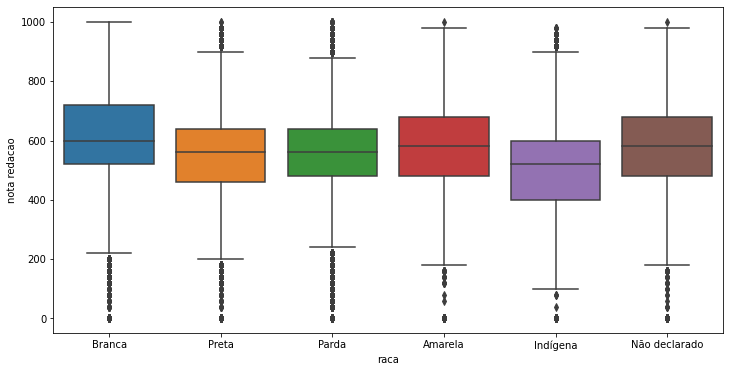

In [44]:
ax = sns.boxplot(x = 'raca', y = 'nota redacao', data = enem)
ax.figure.set_size_inches(12,6)

In [45]:
pessoas_pretas = enem.query("raca == 'Preta'")['nota redacao']
pessoas_pardas = enem.query("raca == 'Parda'")['nota redacao']
pessoas_indigenas = enem.query("raca == 'Indígena'")['nota redacao']
pessoas_amarelas = enem.query("raca == 'Amarela'")['nota redacao']
pessoas_brancas = enem.query("raca == 'Branca'")['nota redacao']
pessoas_nao_decladas = enem.query("raca == 'Não declarado'")['nota redacao']

<AxesSubplot:xlabel='nota redacao', ylabel='Count'>

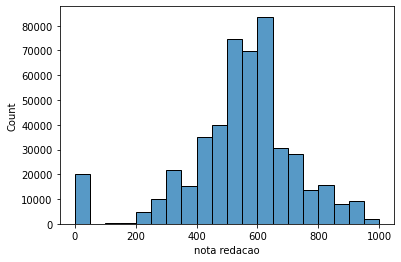

In [46]:
sns.histplot(pessoas_pretas, bins=20)


<AxesSubplot:xlabel='nota redacao', ylabel='Count'>

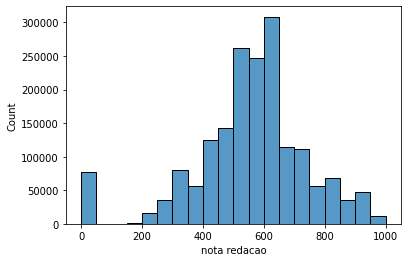

In [47]:
sns.histplot(pessoas_pardas, bins=20)

<AxesSubplot:xlabel='nota redacao', ylabel='Count'>

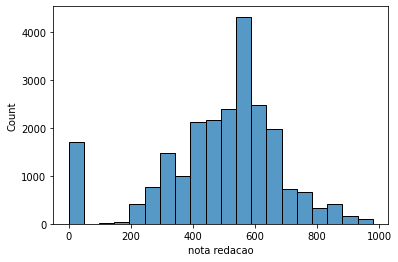

In [48]:
sns.histplot(pessoas_indigenas, bins=20)

<AxesSubplot:xlabel='nota redacao', ylabel='Count'>

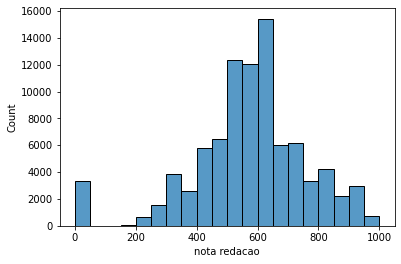

In [49]:
sns.histplot(pessoas_amarelas, bins=20)

<AxesSubplot:xlabel='nota redacao', ylabel='Count'>

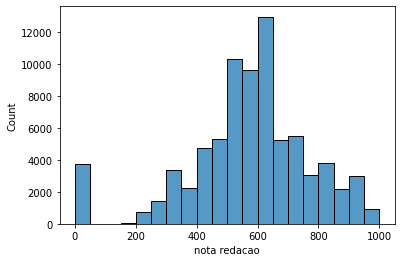

In [50]:
sns.histplot(pessoas_nao_decladas, bins=20)